In [ ]:
#1. import library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from sklearn.cluster import KMeans

In [ ]:
#2. upload file dataset

from google.colab import files
file = files.upload()

Saving Mall_Customers.csv to Mall_Customers (4).csv


In [ ]:
#3. Membaca file inputan

df = pd.read_csv(io.BytesIO(file['Mall_Customers.csv']))
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# extract data feature

x = df.iloc[:, [3, 4]].values

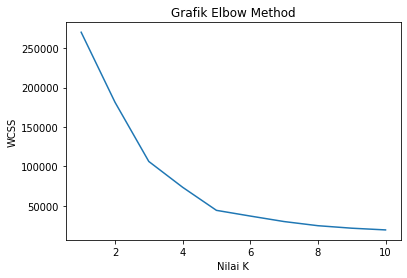

In [ ]:
# menghitung nilai k yang optimal

#menggunakan metode elbow
wcss_list= []  #Inisialiasi list dari hasil nilai wcss

#Iterasi 1-10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('Grafik Elbow Method')
plt.xlabel('Nilai K')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# membuat model KMeans Algorithm

kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

In [ ]:
# menambahkan kolom kluster pada dataframe df

df['Cluster'] = kmeans.labels_
display(df)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


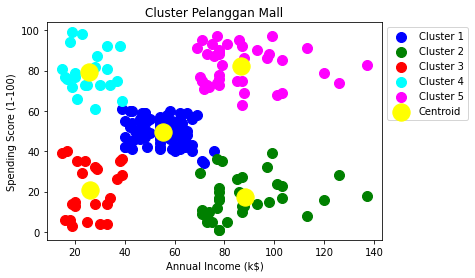

In [ ]:
#visualisasi hasil kluster

plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100,
            c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100,
            c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100,
            c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100,
            c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100,
            c = 'magenta', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroid')
plt.title('Cluster Pelanggan Mall')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

